In [2]:
import gzip
import os
from os.path import isfile, join
import numpy as np

mnist_path = 'dataset'

In [3]:
def list_files(mnist_path):
    return [join(mnist_path,f) for f in os.listdir(mnist_path) if isfile(join(mnist_path, f))]


In [4]:

for f in list_files(mnist_path): print(f)

dataset\t10k-images-idx3-ubyte.gz
dataset\t10k-labels-idx1-ubyte.gz
dataset\train-images-idx3-ubyte.gz
dataset\train-labels-idx1-ubyte.gz


In [6]:
def get_images(mnist_path):
    for f in list_files(mnist_path):
        if 'train-images' in f:
            with gzip.open(f, 'rb') as data:
                _ = int.from_bytes(data.read(4), 'big')
                num_images = int.from_bytes(data.read(4), 'big')
                rows = int.from_bytes(data.read(4), 'big')
                cols = int.from_bytes(data.read(4), 'big')
                train_images = data.read()
                x_train = np.frombuffer(train_images, dtype=np.uint8)
                x_train = x_train.reshape((num_images, rows, cols))
        elif 'train-labels' in f:
            with gzip.open(f, 'rb') as data:
                train_labels = data.read()[8:]
                y_train = np.frombuffer(train_labels, dtype=np.uint8)
        if 't10k-images' in f:
            with gzip.open(f, 'rb') as data:
                _ = int.from_bytes(data.read(4), 'big')
                num_images = int.from_bytes(data.read(4), 'big')
                rows = int.from_bytes(data.read(4), 'big')
                cols = int.from_bytes(data.read(4), 'big')
                test_images = data.read()
                x_test = np.frombuffer(test_images, dtype=np.uint8)
                x_test = x_test.reshape((num_images, rows, cols))
        elif 't10k-labels' in f:
            with gzip.open(f, 'rb') as data:
                test_labels = data.read()[8:]
                y_test = np.frombuffer(test_labels, dtype=np.uint8)
    
    return x_train, y_train, x_test, y_test        

In [7]:
x_train, y_train, x_test, y_test = get_images(mnist_path)

In [8]:
import matplotlib.pyplot as plt

In [9]:
def plot_number(image):
    plt.imshow(image.squeeze(), cmap=plt.get_cmap('gray'))
    plt.axis('off')


5


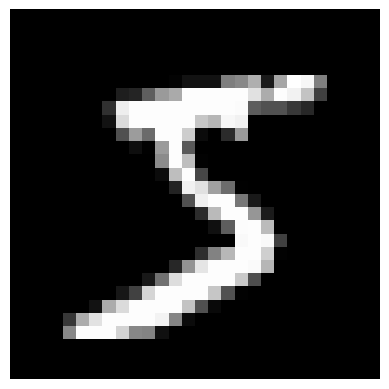

In [36]:
i = 0

print(y_train[i])
plot_number(x_train[i])

In [ ]:
import pandas as pd



In [28]:
print(y_test)
print(x_train)


[7 2 1 ... 4 5 6]
[[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]


In [38]:
# Número de lotes deseado
num_batches = 64

# Dividir el conjunto de datos en lotes
batches = np.array_split(x_train, num_batches)

for i, batch in enumerate(batches):
    print(f"Lote {i+1}: tamaño {batch.shape}")


Lote 1: tamaño (938, 28, 28)
Lote 2: tamaño (938, 28, 28)
Lote 3: tamaño (938, 28, 28)
Lote 4: tamaño (938, 28, 28)
Lote 5: tamaño (938, 28, 28)
Lote 6: tamaño (938, 28, 28)
Lote 7: tamaño (938, 28, 28)
Lote 8: tamaño (938, 28, 28)
Lote 9: tamaño (938, 28, 28)
Lote 10: tamaño (938, 28, 28)
Lote 11: tamaño (938, 28, 28)
Lote 12: tamaño (938, 28, 28)
Lote 13: tamaño (938, 28, 28)
Lote 14: tamaño (938, 28, 28)
Lote 15: tamaño (938, 28, 28)
Lote 16: tamaño (938, 28, 28)
Lote 17: tamaño (938, 28, 28)
Lote 18: tamaño (938, 28, 28)
Lote 19: tamaño (938, 28, 28)
Lote 20: tamaño (938, 28, 28)
Lote 21: tamaño (938, 28, 28)
Lote 22: tamaño (938, 28, 28)
Lote 23: tamaño (938, 28, 28)
Lote 24: tamaño (938, 28, 28)
Lote 25: tamaño (938, 28, 28)
Lote 26: tamaño (938, 28, 28)
Lote 27: tamaño (938, 28, 28)
Lote 28: tamaño (938, 28, 28)
Lote 29: tamaño (938, 28, 28)
Lote 30: tamaño (938, 28, 28)
Lote 31: tamaño (938, 28, 28)
Lote 32: tamaño (938, 28, 28)
Lote 33: tamaño (937, 28, 28)
Lote 34: tamaño (93